# TASK 3

# END-TO-END DATA SCIENCE PROJECT 

## import required libraries 

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler



##  load dataset 

In [9]:
#  Load the dataset
df= pd.read_csv('diabetes.csv')

#  Display first 5 rows
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [11]:
#printing the last 5 values 
df.tail(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
##printing the columns
#if provides the columns names in the dataset
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
#printing the describe
#it provides the statsical summary of the dataset
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [19]:
#printing dataypes of values 
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [21]:
##printing the shape value
#it shows the no of rows and no of columns in the dataset
df.shape

(768, 9)

##  Data Preprocessing 

In [24]:
#clean the column name
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [26]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [28]:
#finding duplicate values
df.duplicated().sum()

0

In [30]:
# Check if there are missing values
print(df.isnull().sum())


pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64


In [41]:
# Define X and y
X = df.drop('outcome', axis=1)  # Features
y = df['outcome']              # Target


In [43]:
X

pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     diabetespedigreefunction  age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [45]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: outcome, Length: 768, dtype: int64

## visualizations 

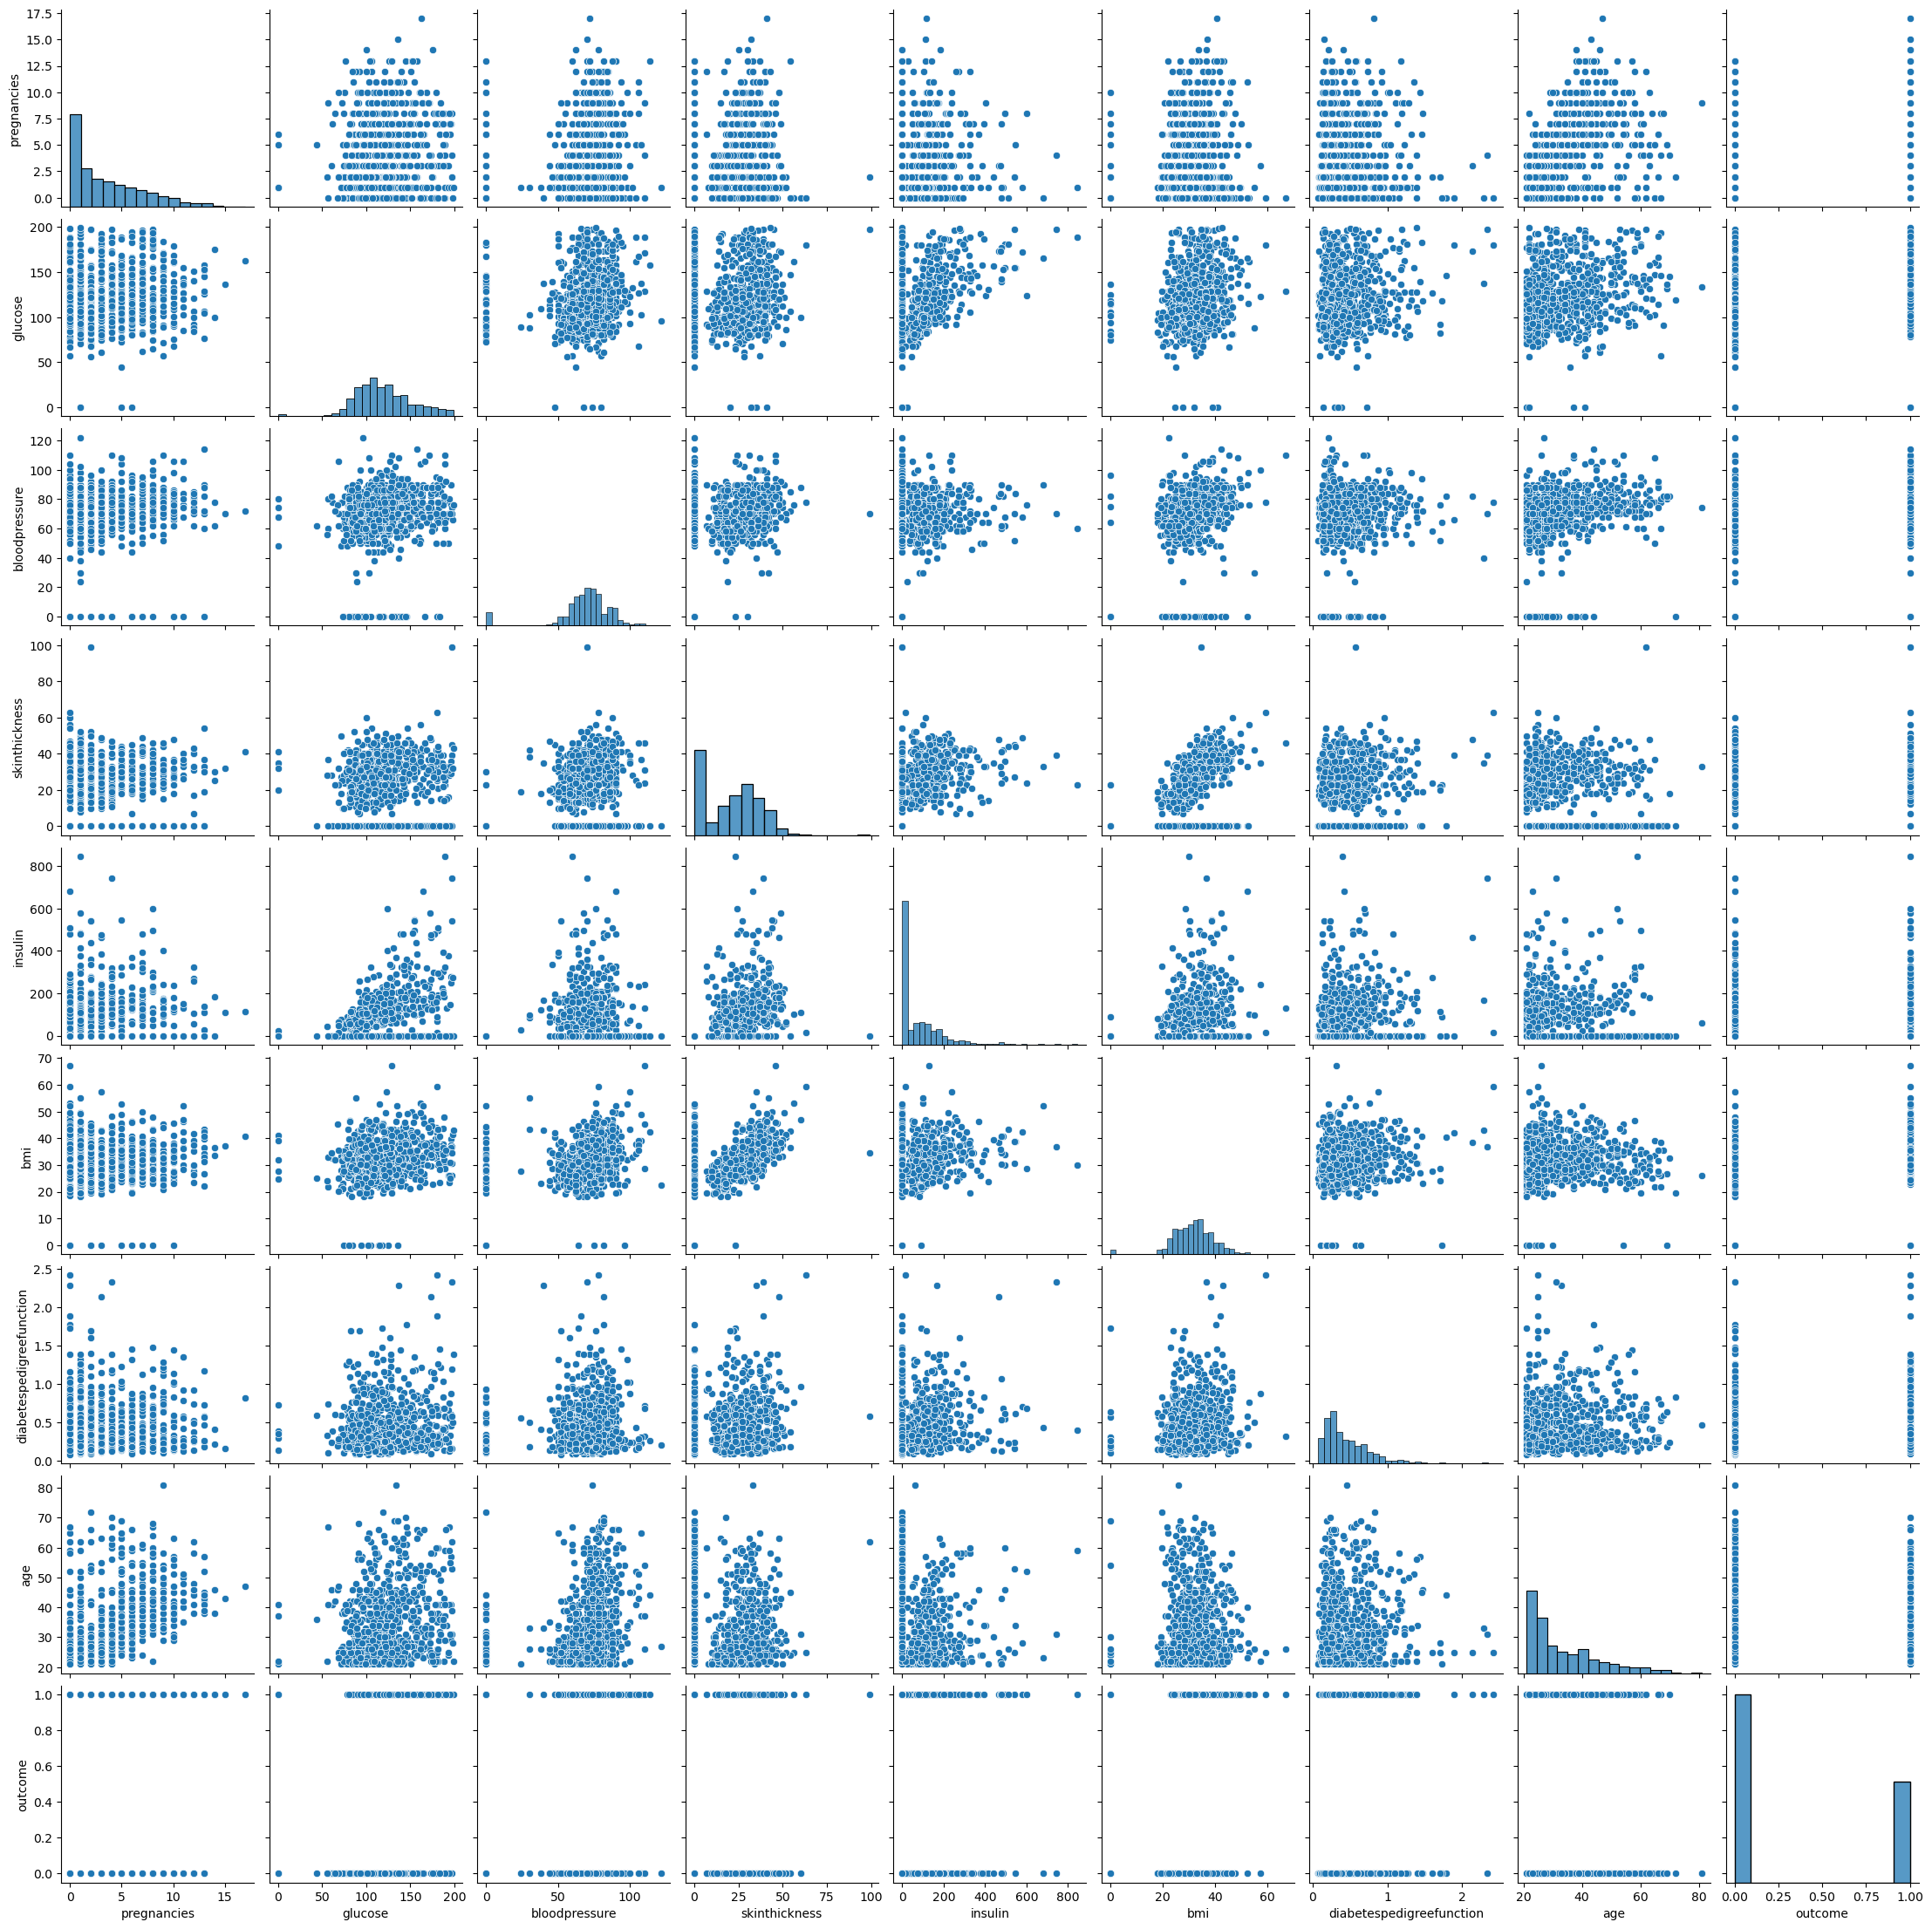

In [65]:
#pairplot:A set of scatterplots and histograms that helps you see how different variables in your data are related.
sns.pairplot(df)
plt.show()


In [69]:
numerical_data=df.select_dtypes(include='number')
correlation_matrix=numerical_data.corr()

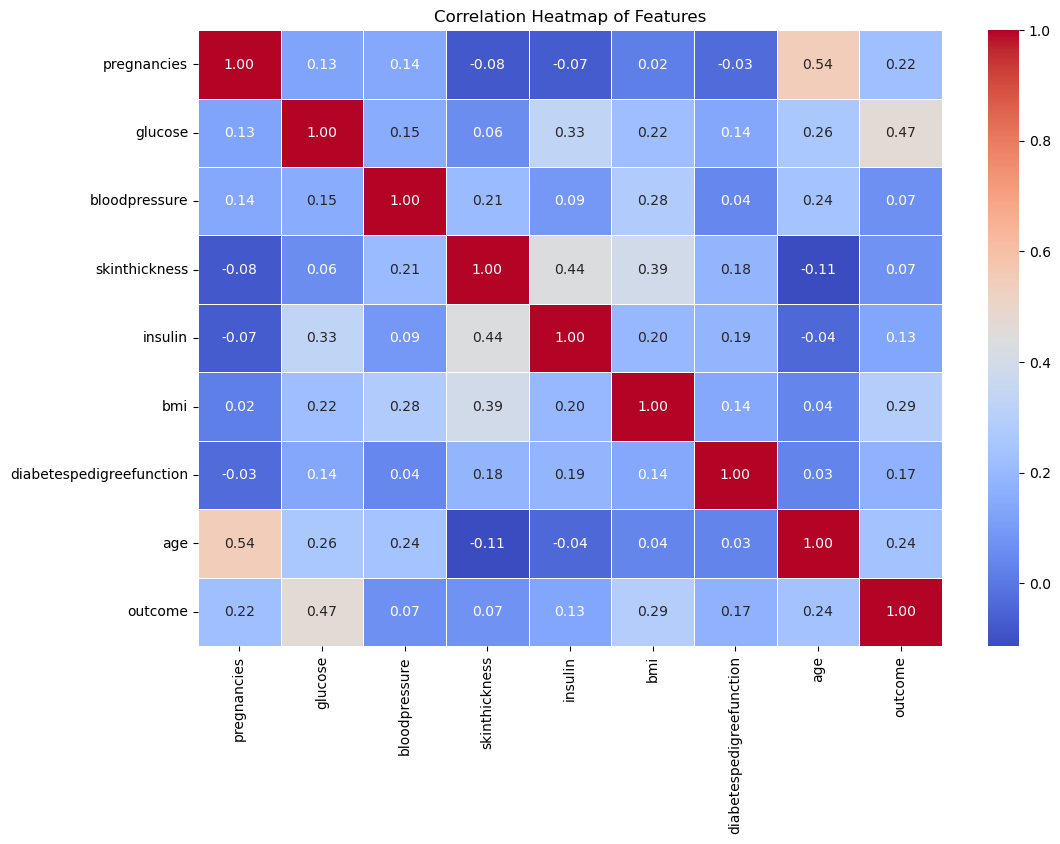

In [71]:
#HeatMap:A picture where values are shown using colors, making it easy to see patterns in your data.
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

##  feature Engineering 

In [47]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

# Step 1: Load your dataset
# (Replace this with your actual file)
df = pd.read_csv('diabetes.csv')  # Example dataset

# Step 2: Select columns to scale
columns_to_scale = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Step 3: Create a copy so original df is not affected
df_scaled = df.copy()

# Step 4: Fit the scaler only on selected columns and transform
scaler = StandardScaler()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Step 5: Save the scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print(" Selected features scaled and scaler saved as 'scaler.pkl'")


 Selected features scaled and scaler saved as 'scaler.pkl'


## spiliting into Train - Test 

In [156]:
from sklearn.model_selection import train_test_split

# Split into 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train with Logistic regression 

In [159]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)



LogisticRegression()

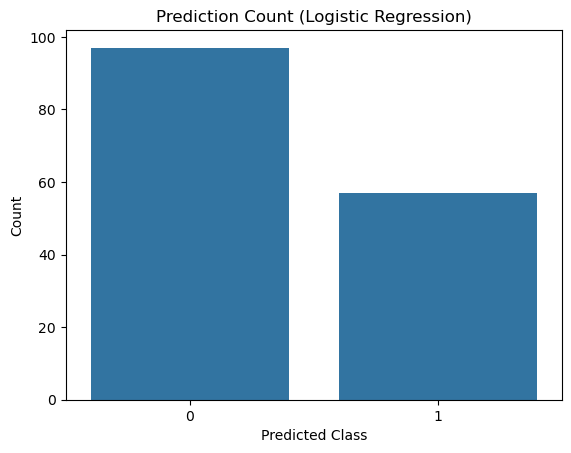

In [161]:
lr_pred = model.predict(X_test)

sns.countplot(x=lr_pred)
plt.title('Prediction Count (Logistic Regression)')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.show()


## Train with Decision Tree

In [164]:
from sklearn.tree import DecisionTreeClassifier
#iniatilize the model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

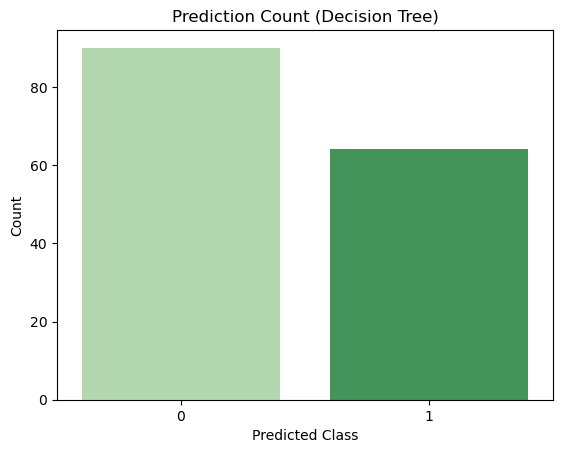

In [166]:
dt_pred = dt_model.predict(X_test)
import seaborn as sns

sns.countplot(x=dt_pred, palette='Greens')
plt.title('Prediction Count (Decision Tree)')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.show()


In [168]:
## Evaluation 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(" Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

print(" Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

 Logistic Regression Results:
Accuracy: 0.7532467532467533
[[79 20]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

 Decision Tree Results:
Accuracy: 0.7467532467532467
[[75 24]
 [15 40]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [170]:
import pickle

# Save Logistic Regression model
with open('diabetes_model.pkl', 'wb') as f:
    pickle.dump(model, f)

